# VISUALIZING MODELS, DATA, AND TRAINING WITH TENSORBOARD

**References:** https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html


PyTorch integrates with `TensorBoard`, a tool designed for visualizing the results of neural network training runs. This tutorial illustrates some of its functionality, using the `Fashion-MNIST` dataset which can be read into PyTorch using `torchvision.datasets`.

In this tutorial, we’ll learn how to:

    1. Read in data and with appropriate transforms (nearly identical to the prior tutorial).
    2. Set up TensorBoard.
    3. Write to TensorBoard.
    4. Inspect a model architecture using TensorBoard.
    5. Use TensorBoard to create interactive versions of the visualizations we created in last tutorial, with less code
    
Specifically, on point **#5**, we’ll see:

    - A couple of ways to inspect our training data
    - How to track our model’s performance as it trains
    - How to assess our model’s performance once it is trained
    
We’ll begin with similar boilerplate code as in the [CIFAR-10 tutorial](http://localhost:8888/notebooks/What%20is%20torch.nn%20really%20%3F.ipynb)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
#transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

In [3]:
#datasets
trainset = torchvision.datasets.FashionMNIST('./data',
                                            download=True,
                                            train=True,
                                            transform=transform)

In [4]:
testset = torchvision.datasets.FashionMNIST('./data',
                                           download=True,
                                           train=False,
                                           transform=transform)

In [5]:
#dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

In [6]:
#constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [7]:
#helper function to show an image
# (used in the 'plot_classes_preds' function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img/2 + 0.5 #unnormalize   
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(img, (1,2,0)))

We’ll define a similar model architecture from that tutorial, making only minor modifications to account for the fact that the images are now one channel instead of three and `28x28` instead of `32x32`:

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [9]:
net = Net()

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## 1. TensorBoard setup

In [11]:
from torch.utils.tensorboard import SummaryWriter

#default `log_dir` is "runs" - we'll be more specific here
writter = SummaryWriter('run/fashion_mnist_experiment_1')

## 2. Writing to TensorBoard

Now let’s write an image to our TensorBoard - specifically, a grid - using make_grid.

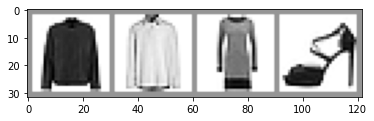

In [12]:
#get somr random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#create gird of images
img_grid = torchvision.utils.make_grid(images)

#show images
matplotlib_imshow(img_grid, one_channel=True)

#write to tensorboard
writter.add_image('four_fashion_mnist_images', img_grid)

In [15]:
%tensorboard --logdir=runs

UsageError: Line magic function `%tensorboard` not found.
